## Imports

In [1]:
from IPython.display import display
import pandas as pd
import re 
import string
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', None)

## Read 

In [3]:
fully_df = pd.read_excel('full_dialect_dataset.xlsx',index_col=0)

In [4]:
len(fully_df)

458197

In [5]:
fully_cleaned_df = fully_df.copy()

## EDA

In [6]:
fully_cleaned_df.text.head(5)

0                                                                            @Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1    @7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..
2                                                                                             @KanaanRema مبين من كلامه خليجي
3                                                                                  @HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4                                                                                          @hmo2406 وين هل الغيبه  اخ محمد 🌸🌺
Name: text, dtype: object

In [7]:
fully_cleaned_df.text.tail(15)

458182    @sweet_zooz يمكن تعرفين بخورة السوق امس او اليوم كانت حاطه فيديو الى بنت لسانها طويل انا بديت رايي في الفيديو ماعجبها كلامي بلكتني شكلها الناس ماتستحمل كلام يعارض فكرها 😅
458183                                                                                                                      انتي ماشفتي كلمة على صارت ع بس 😅 https://t.co/xQnQ7KjuGv
458184                                                                                                                                            @P_ameerah وين هالحزه شكلها باجه 😅
458185                                                                    @Bentelordon ما ادل بالضبط انا سالت وخبروني ورحت ع الوصف لقيته انا ساكن خلف السي تاون اروح له مشي 🚶‍♂️🚶‍♂️
458186                                                                                                                                   @Iraqia__asylah احنا صاحيين مو نايمين 🙋‍♂️😅
458187                                                                         @Bentelordon انا

In [8]:
#I run it multiple time to explore more
fully_cleaned_df.text.sample(15)

215983                                                                   #صداره_بس\nصدارة يعني فخامة ماتليق الا بزعيم اسيا💙\nمع شوية صياح وبكاء من الفقراوية زادت حلاوة الهاشتاق🤣\nواحد قهوة يامعلم https://t.co/BQJoV8tUAL
427363                                                                                                                                                                       @SAUDI_POWER0 يمه فديت خشمه انا هذيله الرجال 👍
361252                                                                                                                                                 مرات تحس انك زعلان بس فيه شي يمنعك تقول انا زعلان خصوصاً من شخص معين
203801                                                                                                                                @h0540309919 @kholood_26 هذا اللي حاصل المسحل ينفذ اجندة اللوبي الازرق\nبقيادة الهيئة
32019                                                                                                                   

Is dataset contains nulls ?

In [9]:
fully_cleaned_df.isnull().sum()

id         0
dialect    0
text       0
dtype: int64

What is the most frequent dialects in our dataset?

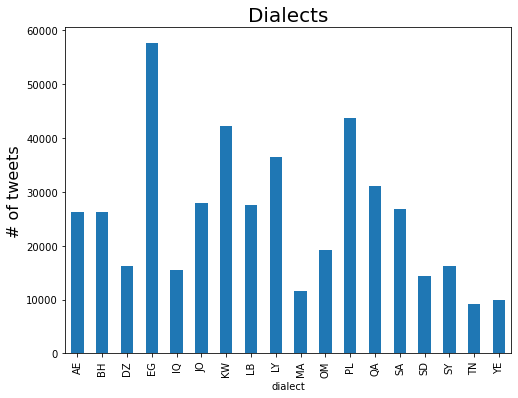

In [10]:
plt.figure(figsize=(8,6))
fully_cleaned_df.groupby('dialect')['id'].count().plot.bar()
# fully_cleaned_df.dialect.hist(bins=16)
plt.title('Dialects', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)

plt.grid(b=False, axis='x')
plt.show()

In [11]:
fully_cleaned_df.groupby('dialect')['id'].count().sort_values(ascending=False)

dialect
EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: id, dtype: int64

what is the variaty in length of tweets ?

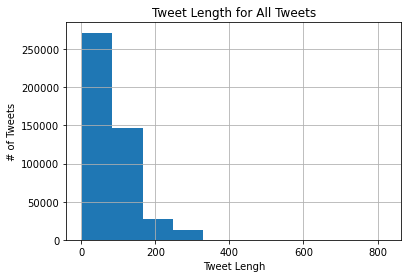

In [12]:
fully_cleaned_df['tweet_len'] = fully_cleaned_df.text.apply(lambda x: len(str(x)))
fully_cleaned_df['tweet_len'].hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

- From the distrubtion we need to check if there are tweets with range 0 more more

In [13]:
fully_cleaned_df[ fully_cleaned_df.tweet_len <= 10]

,id,dialect,text,tweet_len
38123,9.633604e+17,LY,0,1
38332,8.801287e+17,LY,0,1
77456,2.749294e+17,QA,0,1
93579,1.086033e+18,PL,و\nو\nو\nو\nو,9
95926,1.054436e+18,PL,0,1
96200,1.020362e+18,PL,0,1
96223,9.997328e+17,PL,0,1
96247,9.863443e+17,PL,0,1
96270,9.924735e+17,PL,0,1
96308,9.970442e+17,PL,0,1


- There are 42 tweets which has less than 10 in length so we can drop them, because I think they are not meaningful

In [14]:
few_char_tweets = fully_cleaned_df[ fully_cleaned_df.tweet_len <= 10].index
fully_cleaned_df.drop(few_char_tweets,inplace=True)

In [15]:
#check dropping
len(fully_cleaned_df[ fully_cleaned_df.tweet_len <= 10])

0

## Preprocessing Steps
- We need to :
    - remove @username  (which may contains one or more _)
    - remove  links
    - remove any special characters (, ! . ? ...)
    - remove any english words (There may be 1 or 2 english word per tweet, so I think it's not usfel for model context)
    - remove \n new line
    - #### return here to try to remove diacritics

    These steps based on exploration step and may be we must need more steps that not appear at this moment

### step 1: cleaning with regax

In [26]:
punctuation = "!”$%&\’()*+,-./#:;<=>؟?[\\]^_`{|}~•@،"
def preprocessing(text,punctuation=punctuation):
    text = str(text)
    #remove mention
    text = re.sub(r'@[_?A-Z_?a-z_?0-9_?]+', '', text)
    #remove links
    text = re.sub(r"https?:\/\/\S+", '', text)
    #remove \n
    text = re.sub(r"[\n?]", ' ', text)
    #remove special characters (punctuation)
    text = re.sub('[' + punctuation + ']+', ' ', text)
     # remove double spacing
    text = re.sub('\s+', ' ', text)  
    #remove enlish words
    text = re.sub(r'[A-Za-z]','',text)
    #remove numbers 
    text = re.sub(r'[0-9]+','',text)
    return text 

In [27]:
fully_cleaned_df.text  = fully_cleaned_df.text.apply(preprocessing,punctuation) 

In [29]:
#Check results
fully_cleaned_df.sample(15)

,id,dialect,text,tweet_len
220328,9.544925e+17,YE,من يخرج يعرف الفرق بس البعض حتى لما يخرج بلد اخر اكثر تطور وازدهار مايفهم ولا يقول ليش بلدنا ماهي مثلهم,120
177803,1.097261e+18,JO,انتي بتحكي بإشي معروف 😜,31
436539,1.152108e+18,BH,روضة الفايز بالمحرق بس الحين مالها وجود 😥😥,70
68197,1.140934e+18,QA,للامانه دخلنا مدراس ابتدائيه وإعداديه بنات وأولاد جديده والصفوف غير عن الصورة بس مدراس الطلاب إعدادي وثانوي ماندري ما شفناهم 🤦🏽‍♀️,157
362572,8.790214e+17,KW,المهنئييين البواب ومرته ورعانهم عطيتهم عيادي 🤣🤣,64
448628,1.147295e+18,BH,واهني من شاف وجهك من قريييب سامعاً صوتك ومتقهوي وقادع,56
279451,1.177019e+18,EG,مسخره الواحد تبع من التهزيق فيهم والله 😂😂,71
142731,7.739372e+17,SY,بعد راح نشوف كثير,26
67077,8.870504e+17,QA,اخوي محمد يليت تحذف تغريده مهما كان احنا مانرضى هذا ابو الجميع ونعرف طيبته ولاتعودنا نقلل من قدر كبار السن,122
157444,1.143994e+18,JO,اعمق من كدا مفيش 💔,42


### step 2 :check duplicates

In [30]:
#check duplicates
fully_cleaned_df.duplicated().sum()

0

### step 3 : Remove emoji 

In [31]:
#(https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python)
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [34]:
fully_cleaned_df.text  = fully_cleaned_df.text.apply(deEmojify)

In [38]:
#check after removing emojis
fully_cleaned_df.sample(15) 

,id,dialect,text,tweet_len
176070,1.124043e+18,JO,والله العظيم ابطال معروفة اللي يفوز على الليث ياخذ البطولة نهايي كبير الاتحاد التعاون,87
254772,1.177582e+18,EG,واموت واشوف وشهم شكله ايه ولا بيقولوا لبعض ايه دي الوقتي,83
39192,1.031718e+18,LY,نسيتك وين نلقالها فتاوي وين انذوح بدموع الايتام,47
370992,1.047770e+18,KW,اخ عبدالكريم شصار على موضوع الكويتيات المتزوجات غير كويتي بخصوص القرض الاسكاني بداية المجلس وعدتونا والحين ماكو لاحس ولا خبر,142
191074,9.420831e+17,MA,بغيت نقطع من ممر الراجلين ولكن أنا مزال كنتسنى في الباطو هههه,124
16908,9.421573e+17,LY,يا حصلتنا في ورفله ويا حصلة ورفله فينا,38
237927,1.186368e+18,DZ,ايه شفتها نسيت ادا ليلى ولا وحدخرا,71
140152,1.076080e+18,SY,ما هيك بتنقال بتنقال فوووورررررررييييييييييييه 🤕,61
51832,1.027795e+18,LY,الف الف مبروك الحلوان بسرعه,50
397163,8.770464e+17,SD,البت دي امها صينية من عيونها,39


### Step 4 : Stemming text

In [52]:
#https://stackoverflow.com/questions/21492480/python-isristemmer-for-arabic-text
#https://www.nltk.org/api/nltk.stem.isri.html#module-nltk.stem.isri
#test it 
st = ISRIStemmer()
w = 'إعلاميون' 
st.stem(str(w))

'علم'

In [61]:
#stemming function
def stemming(text):
    w=[st.stem(i) for i in word_tokenize(text) ]
    return " ".join(w)

In [66]:
#apply stemming on text 
fully_cleaned_df['stem_text'] = fully_cleaned_df.text.apply(stemming)

In [70]:
fully_cleaned_df.sample(15)

,id,dialect,text,tweet_len,stem_text
301858,1.079466e+18,EG,ايه ياجدو متكبرناش قوي كده,55,ايه جدو متكبرناش قوي كده
252488,2.759569e+17,EG,مرابطه فالتحرير لحمايته من دخول الاسلام عيزينه يفضل معبد بوذى,85,ربط فالتحرير لحم من دخل سلم عيز فضل عبد وذى
331006,8.029353e+17,KW,يوسف الجسمي مبدددع بنفنوف شوق الهادي مكيااااجي رموش عدسات,114,وسف جسم مبدددع فنف شوق هدي مكيااااجي رمش عدس
132736,9.287750e+17,SY,دعمتنا من قبل ندعمك اليوم ✋,36,دعم من قبل دعم اليوم ✋
3082,1.148625e+18,IQ,حياج الله كل الهلا,32,حيج الل كل هلا
265260,1.133928e+18,EG,حبيبى الغالى عليا بزياده,253,حبيبى غلى علا زيد
5432,9.327255e+17,IQ,اي والله ضليت افك الشفرات مافهمت بس كم وحدة,91,اي ولل ضلت افك شفر افهم بس كم وحد
170996,1.155918e+18,JO,هاي شطارة مش دفعة اسئلة السنوات ✌️,69,هاي شطر مش دفع سئل سنو ✌️
289342,1.144348e+18,EG,طب مايشوفها ف البيت ولا لازم يفرج الناس ربنا يعافي,66,طب مايشوف ف بيت ولا لزم فرج ناس ربن يعف
79190,8.804422e+17,QA,له يعز شيوخنا كثر ما عزونا اللهم احفظ اميرنا تميم فلا لنا حياة بدونهنموت ويحيا تميم,92,له يعز شيخ كثر ما عزو لهم حفظ امر تمم فلا لنا حية بدونهنموت ويح تمم


### Step 5 : Lemmatization 
I have read that lemmatization(arabic) is more accurate but I didn't find a specific package for it - may need to search more

- Remove reduendent charachters like "إييييييييه"

## Save cleaned data 

In [71]:
#make a new csv file from the merged df
fully_cleaned_df.to_excel('cleaned_dialect_dataset.xlsx',encoding = 'utf8')

## Exploration cells (you can skip them!)
which I use it to test above regax 

In [15]:
#remove mention 
# fully_cleaned_df.text = fully_cleaned_df.text.apply(lambda x: re.sub(r'@[_?A-Z_?a-z_?0-9_?]+', '', str(x)))
# fully_cleaned_df.text.tail(15)

458182     يمكن تعرفين بخورة السوق امس او اليوم كانت حاطه فيديو الى بنت لسانها طويل انا بديت رايي في الفيديو ماعجبها كلامي بلكتني شكلها الناس ماتستحمل كلام يعارض فكرها 😅
458183                                                                                                           انتي ماشفتي كلمة على صارت ع بس 😅 https://t.co/xQnQ7KjuGv
458184                                                                                                                                            وين هالحزه شكلها باجه 😅
458185                                                                      ما ادل بالضبط انا سالت وخبروني ورحت ع الوصف لقيته انا ساكن خلف السي تاون اروح له مشي 🚶‍♂️🚶‍♂️
458186                                                                                                                                        احنا صاحيين مو نايمين 🙋‍♂️😅
458187                                                                           انا ااكلك رز باللحمه والله نسيت اسم المنطقه اللي بيها مطعم اليمن السع

In [16]:
# #remove links with https
# fully_cleaned_df.text = fully_cleaned_df.text.apply(lambda x: re.sub(r"https?:\/\/\S+", '', str(x)))
# fully_cleaned_df.text.tail(15)

458182     يمكن تعرفين بخورة السوق امس او اليوم كانت حاطه فيديو الى بنت لسانها طويل انا بديت رايي في الفيديو ماعجبها كلامي بلكتني شكلها الناس ماتستحمل كلام يعارض فكرها 😅
458183                                                                                                                                  انتي ماشفتي كلمة على صارت ع بس 😅 
458184                                                                                                                                            وين هالحزه شكلها باجه 😅
458185                                                                      ما ادل بالضبط انا سالت وخبروني ورحت ع الوصف لقيته انا ساكن خلف السي تاون اروح له مشي 🚶‍♂️🚶‍♂️
458186                                                                                                                                        احنا صاحيين مو نايمين 🙋‍♂️😅
458187                                                                           انا ااكلك رز باللحمه والله نسيت اسم المنطقه اللي بيها مطعم اليمن السع

In [10]:
# fully_cleaned_df.text.head(5)

0                                                                             لكن بالنهاية .. ينتفض .. يغير .
1     يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..
2                                                                                         مبين من كلامه خليجي
3                                                                                  يسلملي مرورك وروحك الحلوه💐
4                                                                                   وين هل الغيبه  اخ محمد 🌸🌺
Name: text, dtype: object

In [28]:
fully_cleaned_df.iloc[447592]

id                                                                                                     564832797672484928.0
dialect                                                                                                                  BH
text       خايف عليك ومنك بالحيل خايف\nعزي لقلبي يجمع الحب والخوف\nخليت قلبي والشقاء بك ولايف\nقلبي عمى وش عاد لو عيني تشوف
Name: 447592, dtype: object

In [36]:
# #remove \n
# fully_cleaned_df.iloc[447592].apply(lambda x: re.sub(r"[\n?]", ' ', str(x)))

id                                                                                                 5.648327976724849e+17
dialect                                                                                                               BH
text       خايف عليك ومنك بالحيل خايف عزي لقلبي يجمع الحب والخوف خليت قلبي والشقاء بك ولايف قلبي عمى وش عاد لو عيني تشوف
Name: 447592, dtype: object

In [38]:
# #remove any .
# fully_cleaned_df.iloc[0].apply(lambda x: re.sub(r"[.?]", '', str(x)))

id                1175358310087893e+18
dialect                             IQ
text        لكن بالنهاية  ينتفض  يغير 
Name: 0, dtype: object

In [59]:
# #remove special characters
# removetable = str.maketrans('', '', string.punctuation)
# fully_cleaned_df.iloc[182684].apply(lambda x: str(x).translate(removetable))

id                                                101052896421605e18
dialect                                                           MA
text       بلجيكا  كون درتو لينا فين نتلهاو كاع منديرو لتونس هكا TUN
Name: 182684, dtype: object

In [63]:
#remove english words
# fully_cleaned_df.iloc[182684].apply(lambda x: re.sub(r'[A-Za-z]','',str(x)))

id                                               1.01052896421605+18
dialect                                                             
text       بلجيكا : كون درتو لينا فين نتلهاو كاع منديرو لتونس هكا. #
Name: 182684, dtype: object